# Problem

1. Take grayscale image of size 512x512 and perform the following operations -
    
    a. Decrease its spatial resolution by half every time and observe its change when displaying in the same window size
    
    b. Decrease it intensity level resolution by one bit up to reach its binary format observe its change when displaying in the same window size
    
    c. Illustrate the histogram of the image and make single threshold segmentation observed from the histogram

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [41]:
def hist(img):
    h = np.zeros(256)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h[img[i][j]] += 1
    return h

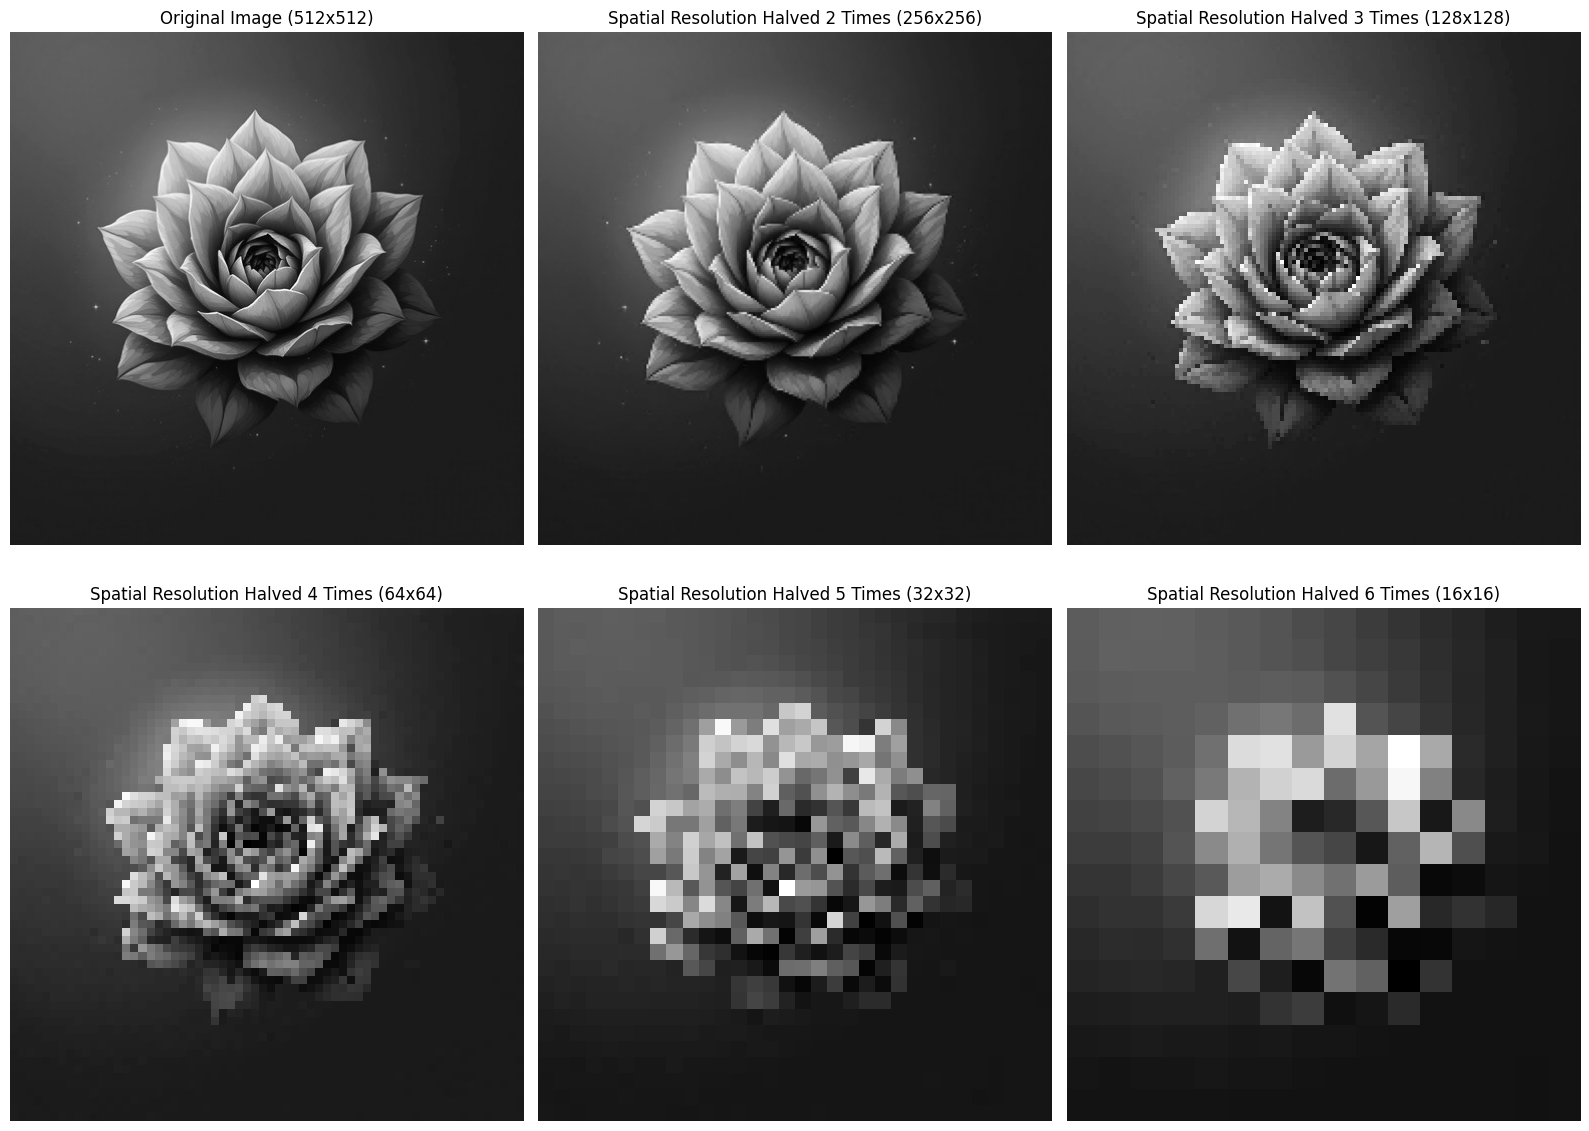

In [ ]:
def resize(image, size):

    target_width, target_height = size
    original_height, original_width = image.shape

    resized_image = np.zeros((target_height, target_width), dtype=image.dtype)

    scale_x = original_width / target_width
    scale_y = original_height / target_height

    for y in range(target_height):
        for x in range(target_width):
            src_x = int(x * scale_x)
            src_y = int(y * scale_y)
            resized_image[y, x] = image[src_y, src_x]

    return resized_image

rose = cv.imread('./rose.jpg') 
rose_gray = cv.cvtColor(rose, cv.COLOR_BGR2GRAY) 

sizes = [(rose_gray.shape[1] // (2 ** i), rose_gray.shape[0] // (2 ** i)) for i in range(6)]

fig, axes = plt.subplots(2, 3, figsize=(16, 12))

for i, size in enumerate(sizes):

    resized_img = resize(rose_gray, size)

    row, col = divmod(i, 3)
    axes[row, col].imshow(resized_img, cmap='gray')
    if i+1 == 1:
         axes[row, col].set_title(f'Original Image ({size[0]}x{size[1]})')
    else:
         axes[row, col].set_title(f'Spatial Resolution Halved {i+1} Times ({size[0]}x{size[1]})')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()
